Train data shape: (297960, 28, 28, 1)
Test data shape: (74490, 28, 28, 1)
Train labels shape: (297960, 26)
Test labels shape: (74490, 26)


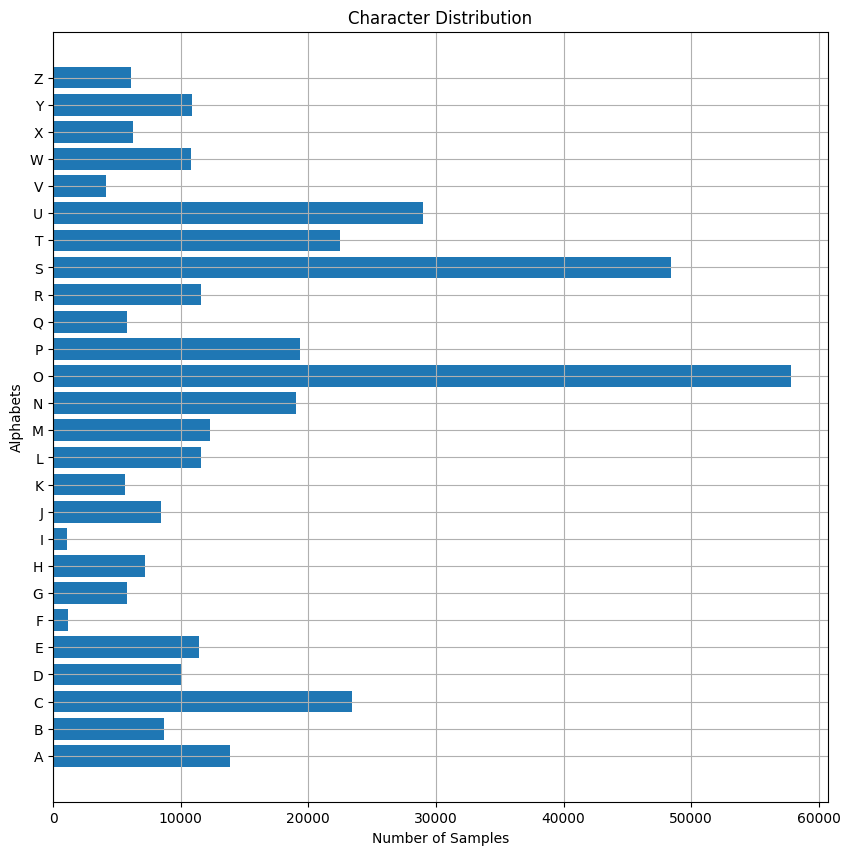

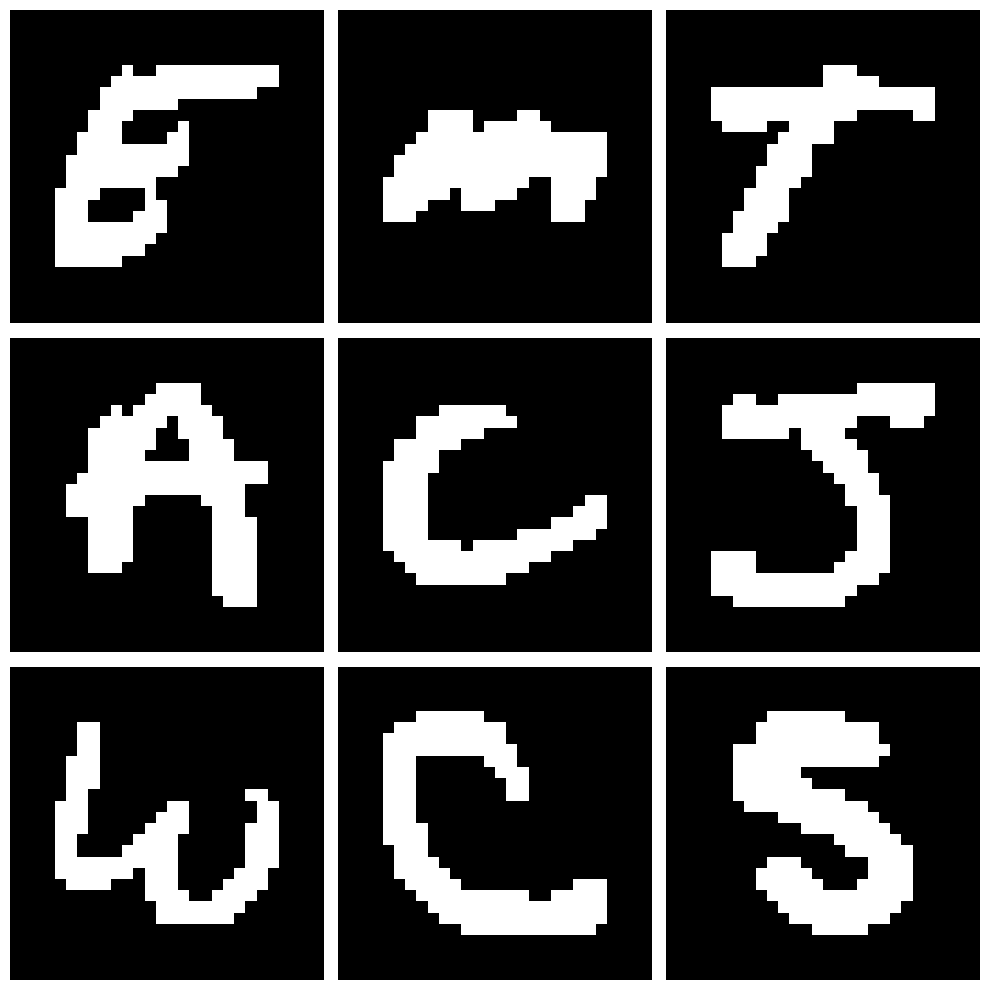

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 373s 159ms/step - accuracy: 0.7965 - loss: 0.6901 - val_accuracy: 0.9734 - val_loss: 0.0929
Epoch 2/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 345s 148ms/step - accuracy: 0.9639 - loss: 0.1225 - val_accuracy: 0.9810 - val_loss: 0.0673
Epoch 3/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 371s 159ms/step - accuracy: 0.9747 - loss: 0.0835 - val_accuracy: 0.9846 - val_loss: 0.0551
Epoch 4/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 374s 156ms/step - accuracy: 0.9789 - loss: 0.0648 - val_accuracy: 0.9832 - val_loss: 0.0575
Epoch 5/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 363s 156ms/step - accuracy: 0.9814 - loss: 0.0573 - val_accuracy: 0.9866 - val_loss: 0.0473



Training Accuracy: 0.9819573163986206
Validation Accuracy: 0.9865619540214539
Training Loss: 0.056674934923648834
Validation Loss: 0.04732634127140045


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,536 (1.57 MB)

 Trainable params: 137,178 (535.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 274,358 (1.05 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


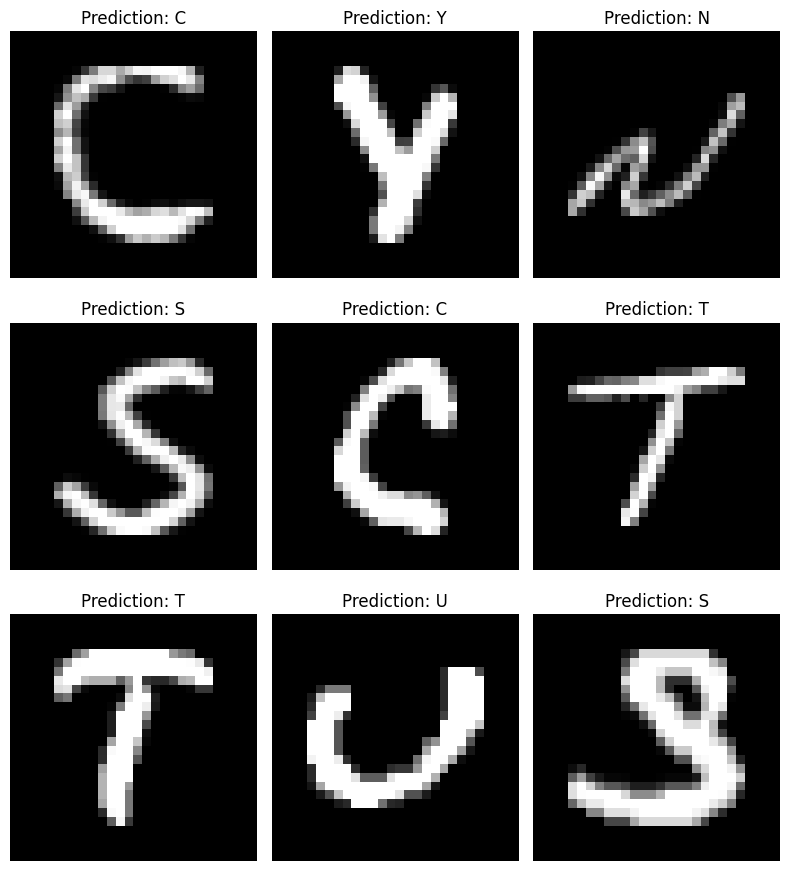


[INFO] External image prediction skipped: test_image.jpg not found.


In [ ]:
# pip install opencv-python keras tensorflow pandas matplotlib scikit-learn

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle, class_weight
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical

# Load and preprocess dataset
data = pd.read_csv("A_Z Handwritten Data.csv").astype('float32')
X = data.drop('0', axis=1).values  # Features
y = data['0'].values               # Labels

# Normalize
X = X / 255.0

# Train-test split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

# Reshape for CNN input
train_x = train_x.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)

print("Train data shape:", train_x.shape)
print("Test data shape:", test_x.shape)

# One-hot encode labels
train_yOHE = to_categorical(train_y, num_classes=26)
test_yOHE = to_categorical(test_y, num_classes=26)

print("Train labels shape:", train_yOHE.shape)
print("Test labels shape:", test_yOHE.shape)

# Label mapping
word_dict = {i: chr(65 + i) for i in range(26)}

# Character distribution
count = np.zeros(26, dtype=int)
for i in y:
    count[int(i)] += 1

alphabets = [word_dict[i] for i in range(26)]
plt.figure(figsize=(10, 10))
plt.barh(alphabets, count)
plt.xlabel("Number of Samples")
plt.ylabel("Alphabets")
plt.title("Character Distribution")
plt.grid(True)
plt.show()

# Visualize samples
shuff = shuffle(train_x[:100])
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
axes = ax.flatten()
for i in range(9):
    img = shuff[i].reshape(28, 28)
    _, img_bin = cv2.threshold((img * 255).astype('uint8'), 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(img_bin, cmap='gray')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# Handle class imbalance
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(train_y),
                                                  y=train_y)
class_weights_dict = dict(enumerate(class_weights))

# Build CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPool2D((2, 2), strides=2),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPool2D((2, 2), strides=2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D((2, 2), strides=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(26, activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(train_x, train_yOHE, epochs=5, batch_size=128,
                    validation_data=(test_x, test_yOHE),
                    class_weight=class_weights_dict)

# Save model
model.save("model_hand.h5")

# Performance
print("\nTraining Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])
print("Training Loss:", history.history['loss'][-1])
print("Validation Loss:", history.history['val_loss'][-1])

# Model structure
model.summary()

# Test predictions
fig, axes = plt.subplots(3, 3, figsize=(8, 9))
axes = axes.flatten()
predictions = model.predict(test_x[:9])
for i, ax in enumerate(axes):
    img = test_x[i].reshape(28, 28)
    pred_class = word_dict[np.argmax(predictions[i])]
    ax.imshow(img, cmap='gray')
    ax.set_title("Prediction: " + pred_class)
    ax.axis('off')
plt.tight_layout()
plt.show()

# Predict external image
try:
    img = cv2.imread("test_image.jpg")
    if img is None:
        raise FileNotFoundError("test_image.jpg not found.")

    img_copy = img.copy()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (400, 440))

    img_copy = cv2.GaussianBlur(img_copy, (7, 7), 0)
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    _, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
    img_final = cv2.resize(img_thresh, (28, 28))
    img_final = img_final / 255.0
    img_final = img_final.reshape(1, 28, 28, 1)

    prediction = model.predict(img_final)
    img_pred = word_dict[np.argmax(prediction)]

    cv2.putText(img, "Character Prediction: " + img_pred, (10, 410),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    cv2.imshow('Character Recognition', img)
    print("\nPrediction on external image:", img_pred)

    while True:
        if cv2.waitKey(1) & 0xFF == 27:  # ESC key
            break
    cv2.destroyAllWindows()

except Exception as e:
    print("\n[INFO] External image prediction skipped:", str(e))
